In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv("../../data/external/HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
price_ranges = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = ['<$5k', '$5k-$10k', '$10k-$15k', '$15k-$20k', '$20k-$25k', 
          '$25k-$30k', '$30k-$35k', '$35k-$40k', '$40k-$45k', '>$45k']

# Categorize prices into ranges
df['PRICE_RANGE'] = pd.cut(df['MEDV'], bins=price_ranges, labels=labels, include_lowest=True)

# Count the number of houses in each price range
price_distribution = df['PRICE_RANGE'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
price_distribution.plot(kind='bar')
plt.title('Boston Housing Dataset - Price Distribution')
plt.xlabel('Price Range')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
df.boxplot(column=list(df.columns), figsize=(12, 8), vert=False)

# Customize the plot
plt.title('Distribution of Boston Housing Dataset Attributes', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Attributes', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout and save the plot
plt.tight_layout()
# plt.savefig('boston_housing_boxplot.png', dpi=300)
plt.show()


In [21]:
num_rows_with_nan = df.isna().any(axis=1).sum()
print(f"Number of rows with NaN values: {num_rows_with_nan}")

Number of rows with NaN values: 112


In [22]:
df=df.fillna(df.mean())
num_rows_with_nan = df.isna().any(axis=1).sum()
print(f"Number of rows with NaN values: {num_rows_with_nan}")

Number of rows with NaN values: 0


In [7]:
df = df.sample(frac=1).reset_index(drop=True)
def split_Dataset(X,y):
    train_ratio = 0.8
    val_ratio = 0.1
    test_ratio = 0.1

    indices = np.arange(X.shape[0])

    train_size = int(train_ratio * X.shape[0])
    val_size = int(val_ratio * X.shape[0])
    test_size = X.shape[0] - train_size - val_size
    train_indices = indices[:train_size]
    val_indices = indices[train_size:train_size + val_size]
    test_indices = indices[train_size + val_size:]

    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    return X_train,y_train,X_val,y_val,X_test,y_test

In [23]:
y=df['MEDV'].values
df=df.drop(columns='MEDV')
cols=df.select_dtypes(include=['int','float']).columns
df[cols] = df[cols].apply(lambda x: (x - x.mean()) / x.std())
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.421911,0.296150,-1.309714,-0.279575,-0.144075,0.413263,-1.209396e-01,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.103054
1,-0.419455,-0.489154,-0.599178,-0.279575,-0.739530,0.194082,3.783412e-01,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.509848
2,-0.419457,-0.489154,-0.599178,-0.279575,-0.739530,1.281446,-2.703594e-01,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.238522
3,-0.418863,-0.489154,-1.329120,-0.279575,-0.834458,1.015298,-8.279505e-01,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.393954
4,-0.414570,-0.489154,-1.329120,-0.279575,-0.834458,1.227362,-5.218221e-01,1.076671,-0.752178,-1.105022,0.112920,0.440616,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.415322,-0.489154,0.126286,-0.279575,0.157968,0.438881,2.119143e-02,-0.625178,-0.981871,-0.802418,1.175303,0.386834,0.000000
502,-0.417353,-0.489154,0.126286,-0.279575,0.157968,-0.234316,2.981647e-01,-0.715931,-0.981871,-0.802418,1.175303,0.440616,-0.518404
503,-0.415541,-0.489154,0.126286,-0.279575,0.157968,0.983986,8.193119e-01,-0.772919,-0.981871,-0.802418,1.175303,0.440616,-1.008940
504,-0.409827,-0.489154,0.126286,-0.279575,0.157968,0.724955,7.573574e-01,-0.667776,-0.981871,-0.802418,1.175303,0.402826,-0.889158


In [14]:
X = df.values
y.shape

(506,)

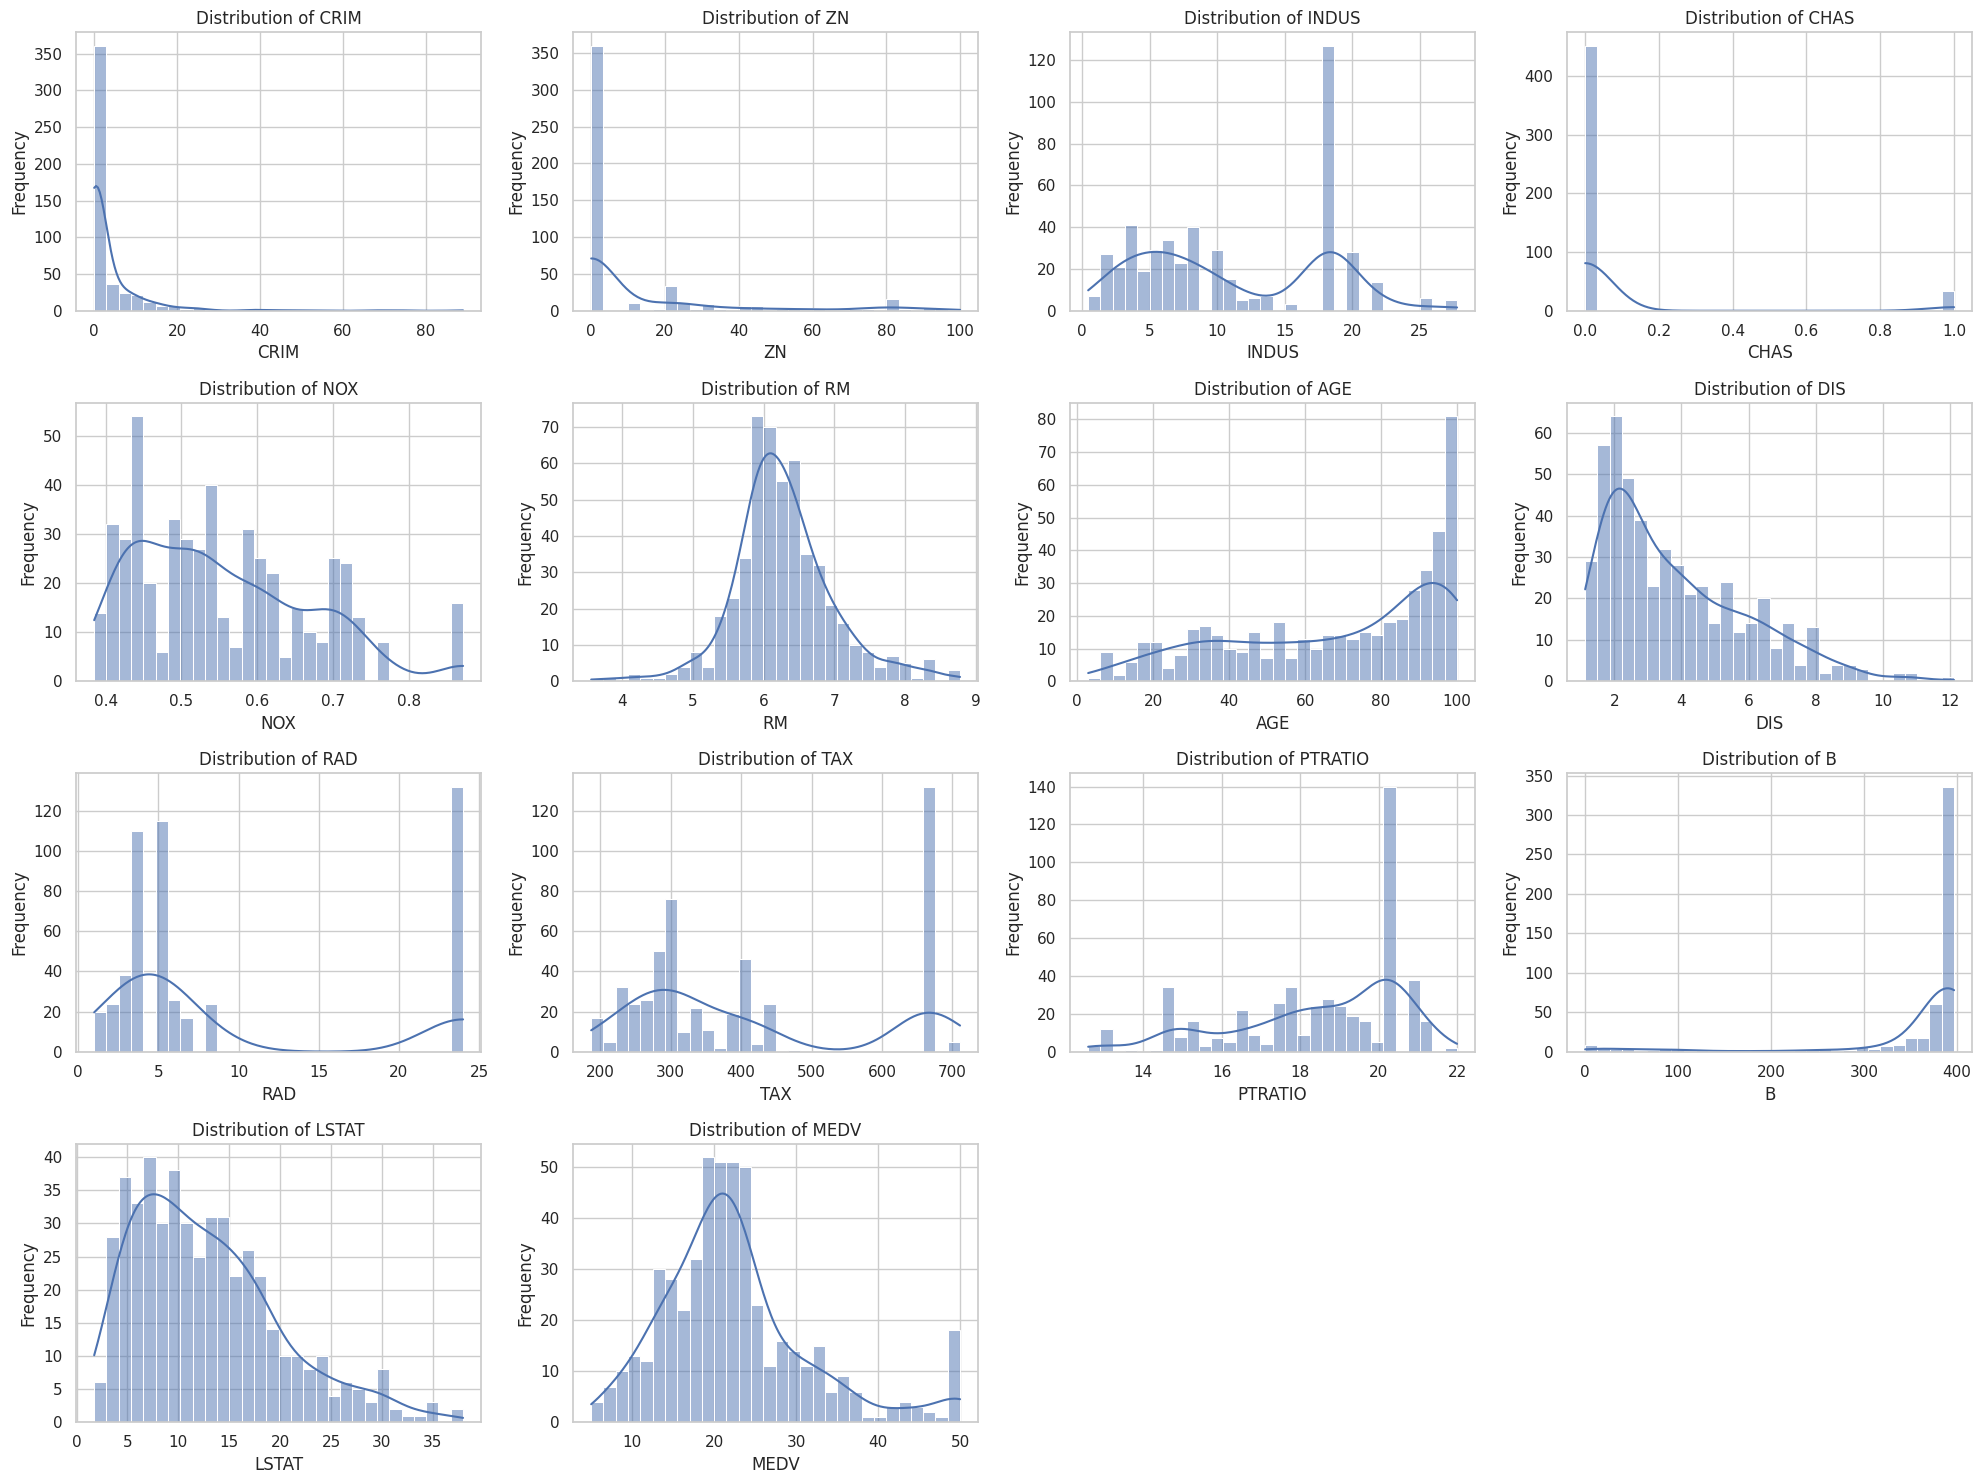

In [4]:
df=pd.read_csv("../../data/external/HousingData.csv")

sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

# Plot distribution of each feature
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('./figures/bostonhouring_distributions.jpg')
plt.show()